In [3]:
#import library and set-up
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%pylab inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision',3)
pd.options.display.float_format = '{:,.4f}'.format

Populating the interactive namespace from numpy and matplotlib


In [18]:
#import data
path = 'C:/Users/AdamChang/Documents/Python/data/PFD Data/1060830 PE Ratio.csv'
df = pd.read_csv(path, encoding='big5hkscs', skiprows=2,index_col=0,
                names=['Code','Company','ROR','DYear','PER','PBR','Time'])

## 先檢視資料欄位

In [19]:
df.head()

,Company,ROR,DYear,PER,PBR,Time
Code,,,,,,
1101,台泥,4.1700,105,18.01,1.2100,106/2
1102,亞泥,3.3500,105,20.53,0.7500,106/2
1103,嘉泥,1.6700,105,42.86,0.4600,106/2
1104,環泥,6.5800,105,9.5,0.9100,106/2
1108,幸福,6.7600,105,24,0.7900,106/2


# 各Column名詞代稱
---
* Code: 股市代號
* Company: 公司名稱
* ROR: 股票殖利率
* DYear: 股利年度
* PER: 本益比
* PBR: 股價淨值比
* Time: 財報年/季

In [5]:
#View the data summary
df.describe(include='all')

,Company,ROR,DYear,PER,PBR,Time
count,894,894.0000,894.0000,894,894.0000,894
unique,894,nan,nan,643,nan,2
top,長榮,nan,nan,-,nan,106/2
freq,1,nan,nan,173,nan,884
mean,NaN,3.5982,105.0000,NaN,1.9397,NaN
std,NaN,2.8266,0.0000,NaN,3.8326,NaN
min,NaN,0.0000,105.0000,NaN,0.3700,NaN
25%,NaN,1.0750,105.0000,NaN,0.8900,NaN
50%,NaN,3.6150,105.0000,NaN,1.2900,NaN
75%,NaN,5.5600,105.0000,NaN,2.0875,NaN


# 檢視資料的Summary
---
* 對ROR來說，Mean與Median接近，推估股市平均報酬約略3.6%左右
* 對PBR來說，Mean=1.94, Median=1.29，推估資料向左側集中，大部分股價淨值比偏高
* PER需要清理資料後才能檢視其概況

# 資料清理
1. 刪除股利年分、財報年/季欄位
2. 將本益比欄位補0值, 清除為字串值的PER，並指定為float

In [6]:
#tidy data
del df['DYear']
del df['Time']

df['PER'] = df.PER.replace({'-':0})

for i in range(len(df['PER'])):
    if type(df['PER'].iloc[i]) == str:
        df['PER'].iloc[i] = df['PER'].iloc[i].replace(',','')
        
df['PER'] = df['PER'].astype(float)

C:\Users\AdamChang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# 導入Bokeh Library

In [7]:
#import visualization library
from bokeh.charts import Histogram
from bokeh.io import output_notebook, show
from bokeh.models import HoverTool
from bokeh.layouts import column

In [8]:
output_notebook()

Loading BokehJS ...

# 檢視各項資料的分佈狀況

In [9]:
#show ROR historgram
histROR = Histogram(df, values='ROR',title='ROR Historgram')
histPER = Histogram(df, values='PER',title='PER Historgram')
histPBR = Histogram(df, values='PBR', title='PBR Historgram')

show(column(histROR,histPER,histPBR))

PER 和 PBR明顯有較大的Outliar, 以Scatter檢視其合理的資料範圍

In [10]:
from bokeh.charts import Scatter
from bokeh.models import ColumnDataSource

In [11]:
hover = HoverTool(tooltips=[
        ('PBR','@x_values'),
        ('PER','@y_values')
    ])
scatter = Scatter(df, x='PBR', y='PER', legend=None, title='PBR vs PER',tools=[hover,'save'],color='navy')
show(scatter)

` Outliar 剔除條件:` 
* 篩選PBR < 14
* 篩選PER < 20

` 篩選ROR:`
* 篩選殖利率大於平均值3.6的公司

In [12]:
#Delete outliar & filter the ROR
df2 = df.loc[(df.PBR<14)&(df.PER<20)&(df.ROR>3.6)]

檢視篩選後Data的分布狀況

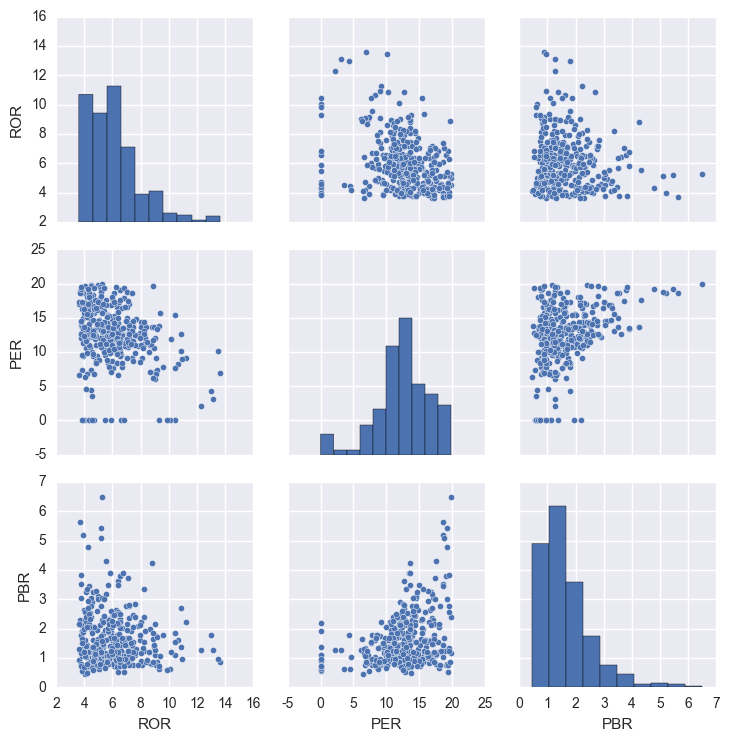

In [13]:
sns.pairplot(df2)

檢視篩選出的Data correlation

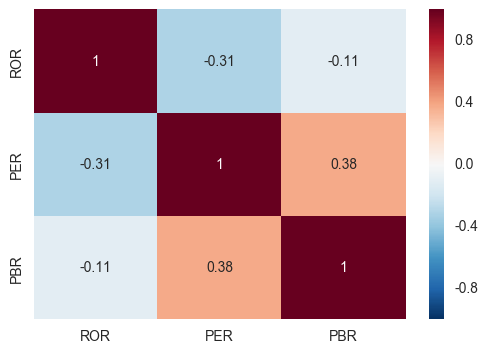

In [14]:
#View the correlation of data
dfCorr = df2.corr()
sns.heatmap(dfCorr,annot=True)

再一次檢視資料Summary

In [15]:
df3RORSort = df2.sort_values(by='ROR',ascending=False)
df3RORSort.describe()

,ROR,PER,PBR
count,361.0000,361.0000,361.0000
mean,6.0676,12.5014,1.6422
std,1.8345,4.1980,0.9116
min,3.6100,0.0000,0.4500
25%,4.6400,10.7200,1.0200
50%,5.8400,12.6600,1.3800
75%,6.9700,15.2200,2.0700
max,13.6200,19.9000,6.5000


# 檢視根據篩選條件，ROR前100間的公司

In [16]:
df3RORSort.head(100)

,Company,ROR,PER,PBR
Code,,,,
3056,總太,13.6200,6.9800,0.8700
4984,科納-KY,13.4700,10.0900,0.9500
3040,遠見,13.1200,3.1800,1.2800
1463,強盛,12.9900,4.3300,1.8000
6235,華孚,12.2800,2.1500,1.2800
2404,漢唐,11.2400,9.1800,2.2200
2936,客思達-KY,10.9300,8.9900,0.9600
3679,新至陞,10.8800,10.1900,1.3900
1808,潤隆,10.8800,12.6600,2.6900
